# Load relevant python libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Useful functions

In [2]:
def get_gyre_data(gyre_file_name):
    gyre_data = np.genfromtxt(gyre_file_name, skip_header=5, names=True)
    
    freq = gyre_data['Refreq']
    n_g = gyre_data['n_g']
    n_p = gyre_data['n_p']
    n_pg = gyre_data['n_pg']

    idx = np.where(n_p == 0)[0]

    return freq[idx], n_g[idx]

def plot_pattern(ax, freq, n_g, color, label):
    
    n_idx = []
    n_diff = np.diff(n_g)
    freq_list = []
    for i in range(len(n_diff)):
        if abs(n_diff[i]) == 1:
            freq_list = np.append(freq_list, freq[i])
        else:
            periods = 1/freq_list[::-1]     # period in days
            dP = np.diff(periods)*86400.    # period spacing in seconds
            ax.plot(periods[1:], dP, color=color, marker='o', label='_nolegend_')
            freq_list = []
            
    periods = 1/freq_list[::-1]     # period in days
    dP = np.diff(periods)*86400.    # period spacing in seconds
    ax.plot(periods[1:], dP, color=color,marker='o', label=label)
    
    ax.set_xlabel('Period [days]', fontsize=15)
    ax.set_ylabel('Period spacing [seconds]', fontsize=15)
    ax.tick_params(labelsize=12)

# Now to the actual plotting

## Plotting a single pattern

Start by reading your GYRE summary file

In [3]:
# Input the name of your GYRE summary file
gyre_summary_file_name = 'example_gyre_file.txt'

# Get frequencies and radial orders from file
freq, n_g = get_gyre_data(gyre_summary_file_name)

Next up is plotting the pattern

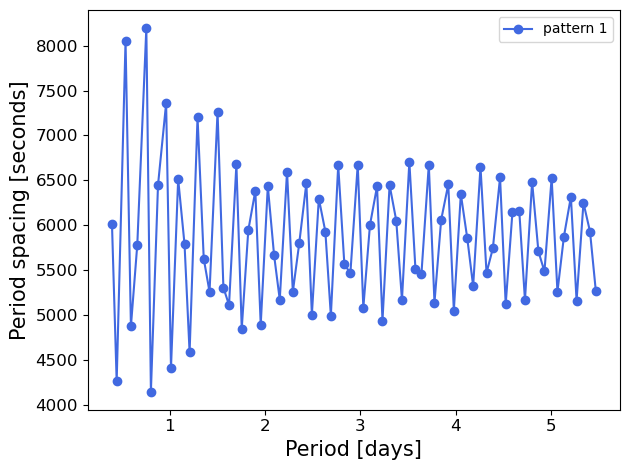

In [4]:
fig = plt.figure()
ax = plt.subplot(111)
plot_pattern(ax, freq, n_g, color='royalblue', label='pattern 1')
ax.legend()
plt.tight_layout()

## Plotting multiple patterns

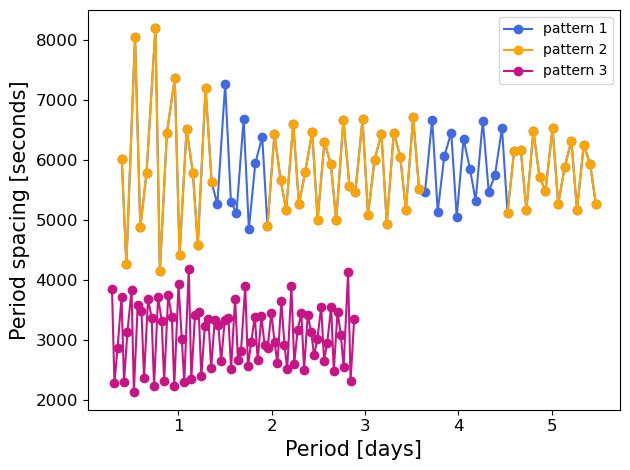

In [5]:
# Input the name of your GYRE summary file
gyre_summary_file_names = ['example_gyre_file.txt', 'example_gyre_file2.txt', 'example_gyre_file3.txt']
colors = ['royalblue', 'orange', 'mediumvioletred']
labels = ['pattern 1', 'pattern 2', 'pattern 3']

fig = plt.figure()
ax = plt.subplot(111)
for f in range(len(gyre_summary_file_names)):
    # Get frequencies and radial orders from file
    freq, n_g = get_gyre_data(gyre_summary_file_names[f])
    
    # Plot pattern
    plot_pattern(ax, freq, n_g, color=colors[f], label=labels[f])

# Add legend to plot    
ax.legend()
plt.tight_layout()